# Phân tích nhân tố

Bộ dữ liệu chứa một cuộc khảo sát về sự hài lòng của hành khách hàng không. Nó có 129487 quan sát và 15 cột, trong đó 15 cột thể hiện phản hồi của khách hàng, theo thang điểm từ 1 đến 5, đối với một cuộc khảo sát đánh giá các khía cạnh khác nhau của chuyến bay (Dịch vụ wifi trên máy bay, đồ ăn và đồ uống, lên máy bay trực tuyến, chỗ ngồi thoải mái, v.v. ). 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("C:/Users/Lenovo\Downloads\data.csv",encoding='unicode_escape')
df = df.dropna() 
df

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (4134611195.py, line 1)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [12]:
# Checking for the missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


Giờ ta sẽ xem xét biểu đồ tương quan của tất cả các biến để xem liệu có biến nào vô dụng hoặc quá tương quan với các biến khác hay không.

In [14]:
df.drop(columns='InvoiceDate',axis=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


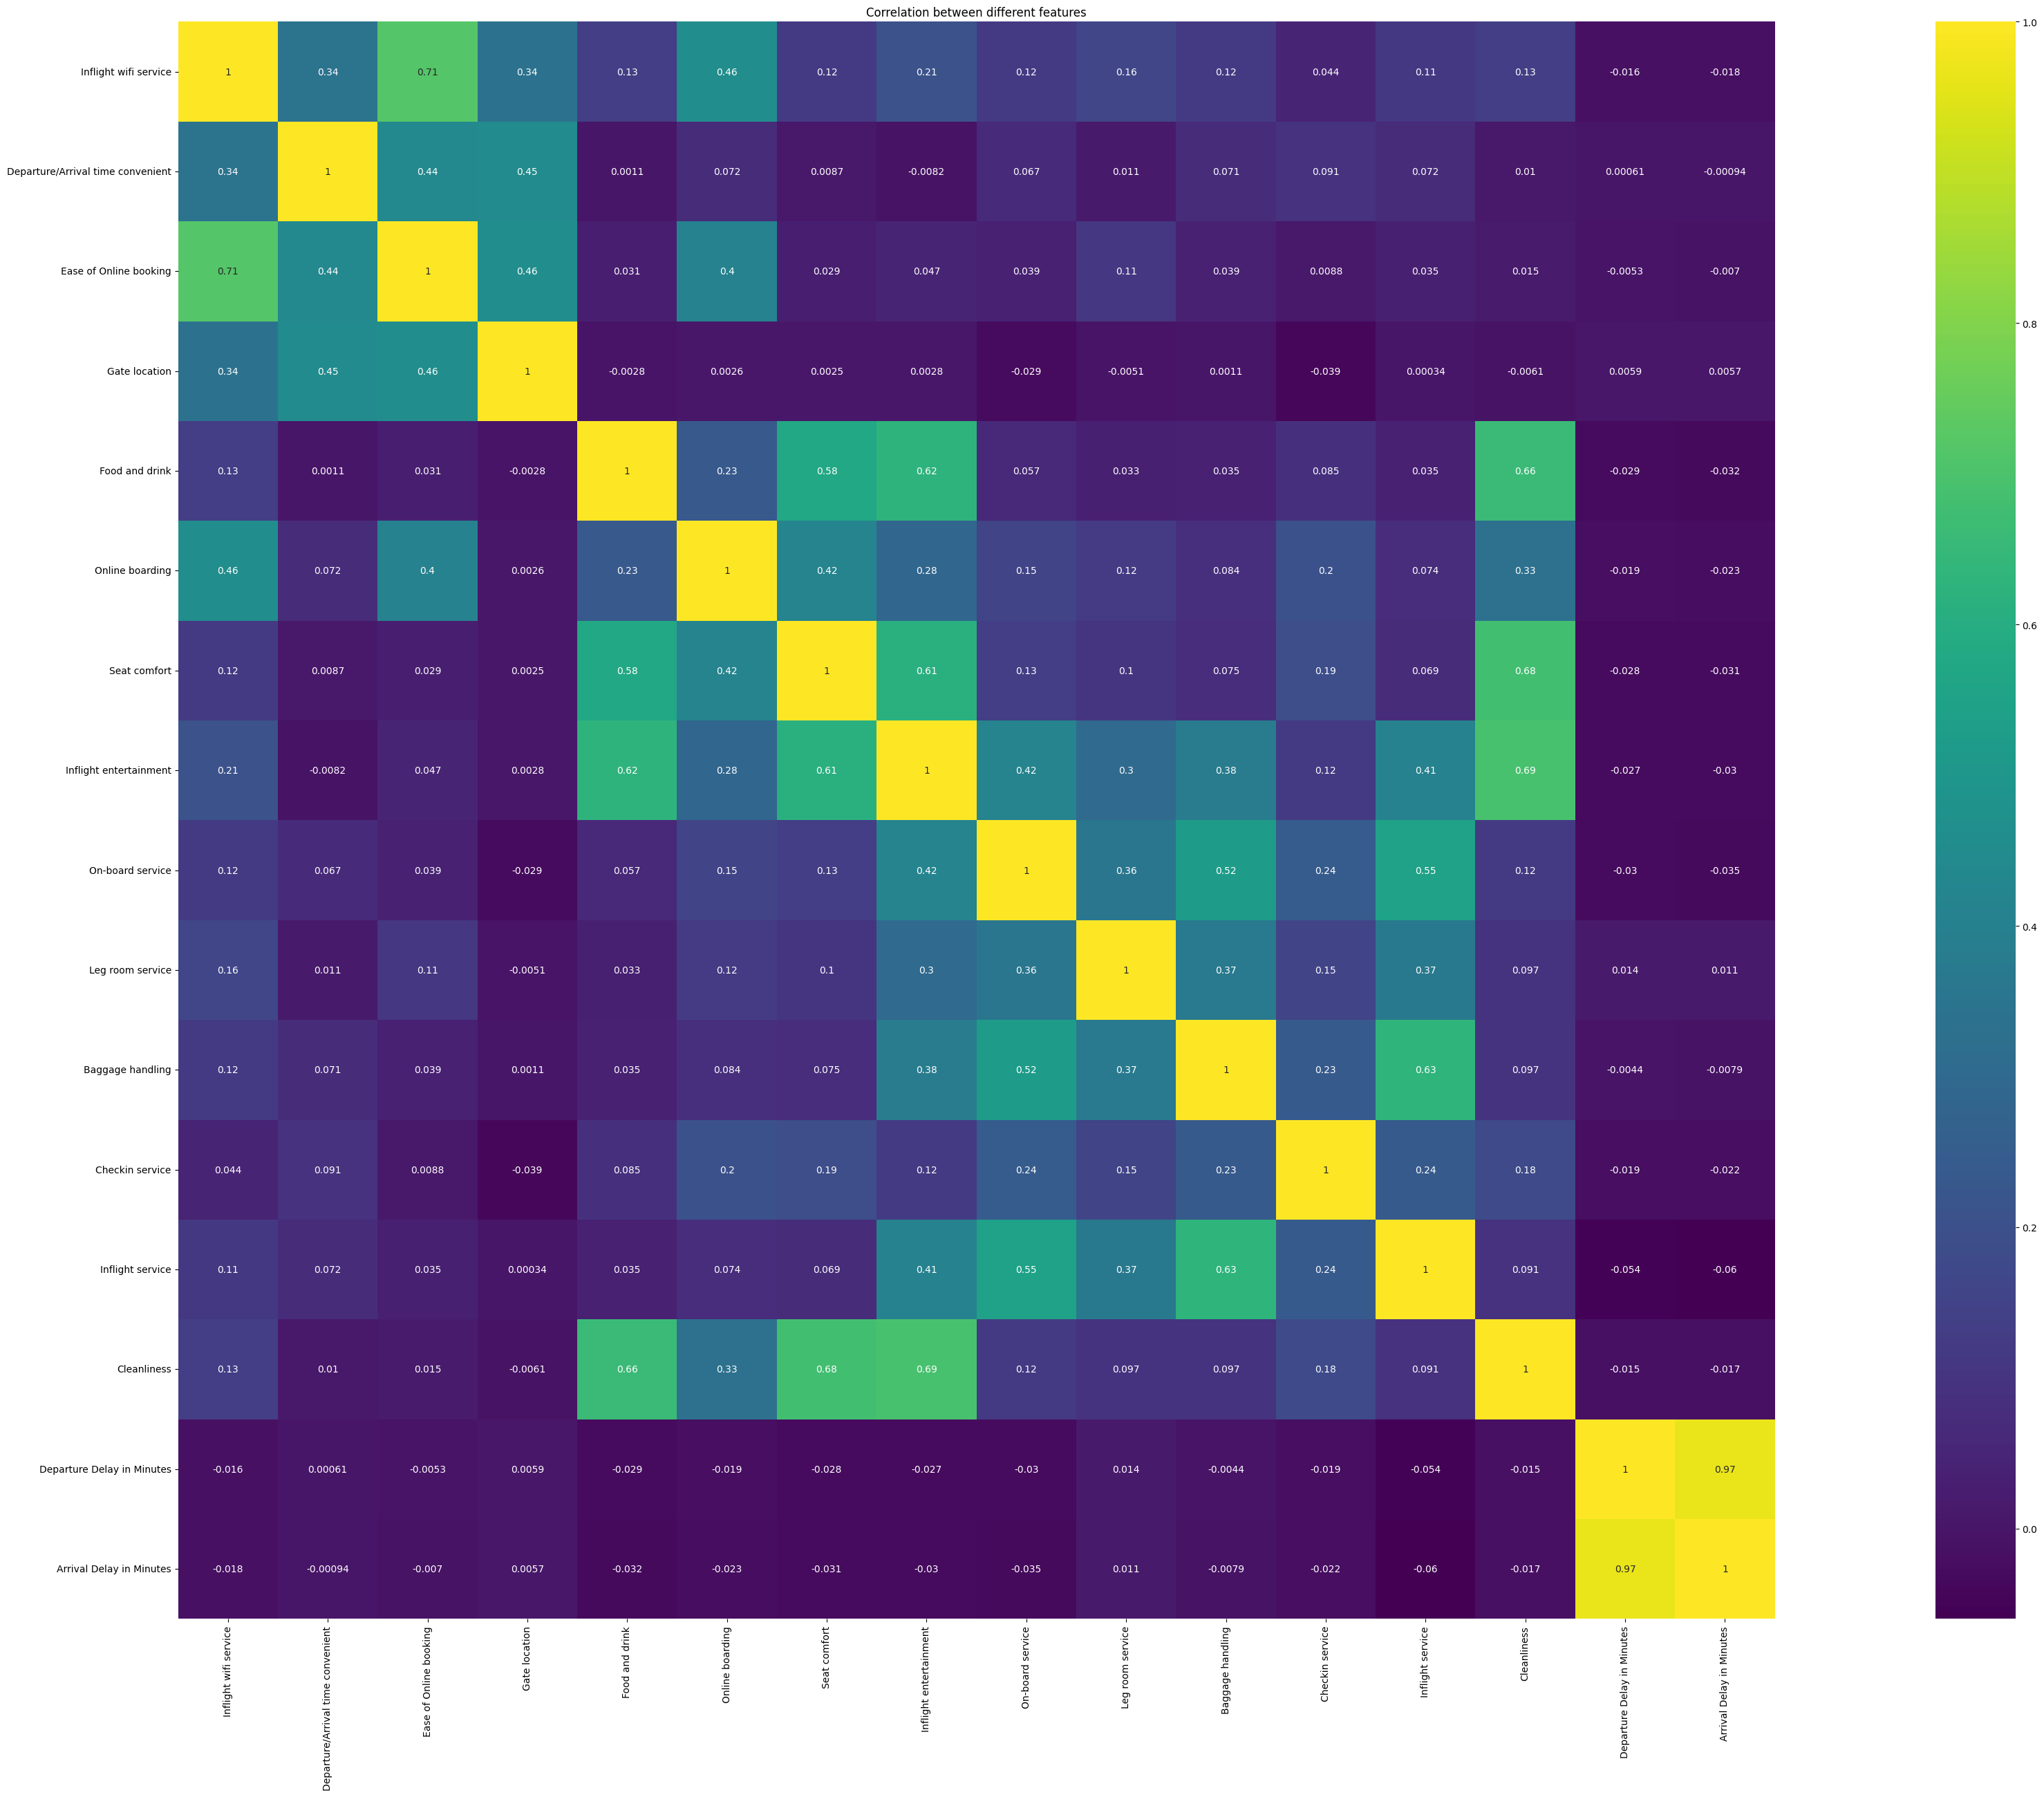

In [5]:
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(60, 30))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different features')
plt.show()

Một số biến có mối tương quan khá cao, đặc biệt là những biến liên quan đến câu trả lời khảo sát. Tuy nhiên, điều thực sự nổi bật là mối tương quan cực kỳ cao (0,98) giữa “Departure Delay in Minutes” và “Arrival Delay in Minutes”. Điều đó có ý nghĩa. Nếu máy bay khởi hành muộn hơn dự kiến thì nó cũng sẽ đến muộn hơn. Xem xét mối tương quan cực kỳ cao này, tôi quyết định chỉ xóa cột đó khỏi tập dữ liệu.

In [6]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

So now that we got rid of useless variables, here are the 15 variables that will be used for the factor analysis.

*Inflight wifi service               
*eparture/Arrival time convenient    
*Ease of Online booking               
*Gate location                        
*Food and drink                       
*Online boarding                      
*Seat comfort                         
*Inflight entertainment               
*On-board service                     
*Leg room service                     
*Baggage handling                     
*Checkin service                      
*Inflight service                     
*Cleanliness        
*Checkin service  

# Importing Factor Analyzer
Cài đặt thư viện factor_analyzer

In [7]:
!pip install factor_analyzer 


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from factor_analyzer import FactorAnalyzer 

# Kiểm tra một vài giả định
1. Kiểm định Bartlett: để kiểm tra xem các biến quan sát có tương quan với nhau hay không bằng cách sử dụng ma trận tương quan quan sát
2. Kaiser-Meyer-Olkin Test: đo lường mức độ phù hợp của dữ liệu để phân tích nhân tố


In [9]:
# Bartlett’s test - Adeqacy test for using Factor analysis

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(df)

(752622.6835461138, 0.0)

In [10]:
# Another test to check suitability for factor analysis 
#Kiem dinh KMO  do muc do phu hop cua du lieu de ptnt, uoc tinh ty le phuong sai giua cac bien. Chi so KMO >= 0,6 dc coi la phu hợp

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print(kmo_model)

0.7810578543966449


Cả kiểm định cầu Bartlett và KMO đều chỉ ra rằng khung dữ liệu phù hợp để phân tích nhân tố.

# Xác định số lượng các nhân tố

Để tìm ra chúng ta cần bao nhiêu yếu tố, chúng ta có thể xem xét giá trị riêng,
là thước đo mức độ phương sai của các biến mà một yếu tố giải thích.
Trong phương pháp trích xuất thành phần chính, phương sai của từng yếu tố sẽ bằng giá trị riêng của nó.
Giá trị riêng biểu thị tổng lượng phương sai có thể được giải thích bằng một thành phần chính nhất định. 
Giá trị riêng lớn hơn một có nghĩa là yếu tố giải thích nhiều phương sai hơn một biến duy nhất

Kiểm tra phương sai của từng yếu tố. 
Phương sai càng cao thì yếu tố đó càng giải thích được sự biến đổi của dữ liệu.
Nếu không biết cần trích xuất bao nhiêu yếu tố trong phân tích, trước tiên ta có thể sử dụng phương pháp trích xuất thành phần chính, không xoay vòng, sử dụng số lượng yếu tố mặc định làm đánh giá sơ bộ. 
Sau đó xác định các yếu tố quan trọng là những yếu tố có phương sai (giá trị riêng) lớn hơn một giá trị nhất định. 

In [11]:

#  Factor Analyzer
fa = FactorAnalyzer(rotation=None) 

# Fit the dataframe using Factor Analyzer
fa.fit(df)

# Identify the eigenvalues
ev, v = fa.get_eigenvalues() #eigenvalues

# display the eigenvalues
ev

array([3.79955647, 2.37147549, 2.16897694, 1.06313402, 1.00576476,
       0.94813865, 0.69417644, 0.5372157 , 0.51374933, 0.46777892,
       0.36604041, 0.32883888, 0.29328704, 0.25443485, 0.18743211])

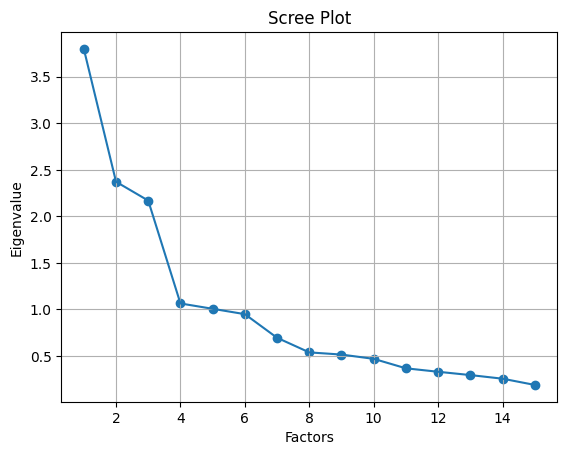

In [12]:
# Vẽ biểu đồ giá trị riêng
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [13]:
fa = FactorAnalyzer(4, rotation='varimax')
fa.fit(df)
ev, v = fa.get_eigenvalues()
ev

array([3.79955647, 2.37147549, 2.16897694, 1.06313402, 1.00576476,
       0.94813865, 0.69417644, 0.5372157 , 0.51374933, 0.46777892,
       0.36604041, 0.32883888, 0.29328704, 0.25443485, 0.18743211])

Việc sử dụng phân tích yếu tố mà không áp dụng quay trước khi áp dụng Varimax là một phương pháp phổ biến trong phân tích yếu tố. Cách tiếp cận này có mục tiêu tìm ra cấu trúc yếu tố ban đầu của dữ liệu mà không áp đặt bất kỳ sự biến đổi hoặc ràng buộc nào lên các yếu tố. Sau đó, sau khi đã xác định được cấu trúc ban đầu, ta có thể sử dụng quay Varimax để cải thiện tính diễn giải và giúp hiểu rõ hơn về mối quan hệ giữa các yếu tố.

In [19]:
# Then, we repeat the factor analyzer using five factors, fitting it, and print the factor loadings for each variables.
print(fa.loadings_)

[[ 9.30524586e-02  1.34820171e-01  6.15484266e-01  4.63960736e-01]
 [-1.03080832e-02  5.30330138e-02  5.89641239e-01 -7.53668780e-03]
 [-3.40824546e-02  2.97308951e-02  7.73799800e-01  4.47061903e-01]
 [ 1.24123550e-02 -5.00149752e-02  6.82242020e-01 -1.12097155e-01]
 [ 7.70889972e-01  7.70639241e-03  3.13261660e-02  3.65647461e-02]
 [ 2.87200409e-01  1.26517336e-01  1.10046710e-01  7.54455745e-01]
 [ 7.55715881e-01  8.39006531e-02 -2.52061075e-02  2.10944006e-01]
 [ 7.65443277e-01  4.69185610e-01  4.35981485e-02  2.28268240e-02]
 [ 8.22942186e-02  7.02357517e-01  1.32758602e-02  4.44093329e-02]
 [ 5.52669975e-02  4.85487176e-01  4.55992198e-02  8.98806720e-02]
 [ 3.31138150e-02  7.63634086e-01  4.93885187e-02 -3.85513296e-02]
 [ 1.11998793e-01  2.89186209e-01 -2.57062004e-02  1.32540883e-01]
 [ 3.29505497e-02  7.99811712e-01  4.93160904e-02 -6.08150900e-02]
 [ 8.53401452e-01  8.88004908e-02 -7.08847757e-06  9.93386637e-02]
 [-2.36059875e-02 -2.96358610e-02  1.08829427e-03 -1.22980488e

In [20]:
lmatrix = pd.DataFrame(fa.loadings_, index = list(df.columns), columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'])
lmatrix #loading matrix
lmatrix

,Factor 1,Factor 2,Factor 3,Factor 4
Inflight wifi service,0.093052,0.134820,0.615484,0.463961
Departure/Arrival time convenient,-0.010308,0.053033,0.589641,-0.007537
Ease of Online booking,-0.034082,0.029731,0.773800,0.447062
Gate location,0.012412,-0.050015,0.682242,-0.112097
Food and drink,0.770890,0.007706,0.031326,0.036565
Online boarding,0.287200,0.126517,0.110047,0.754456
Seat comfort,0.755716,0.083901,-0.025206,0.210944
Inflight entertainment,0.765443,0.469186,0.043598,0.022827
On-board service,0.082294,0.702358,0.013276,0.044409
Leg room service,0.055267,0.485487,0.045599,0.089881


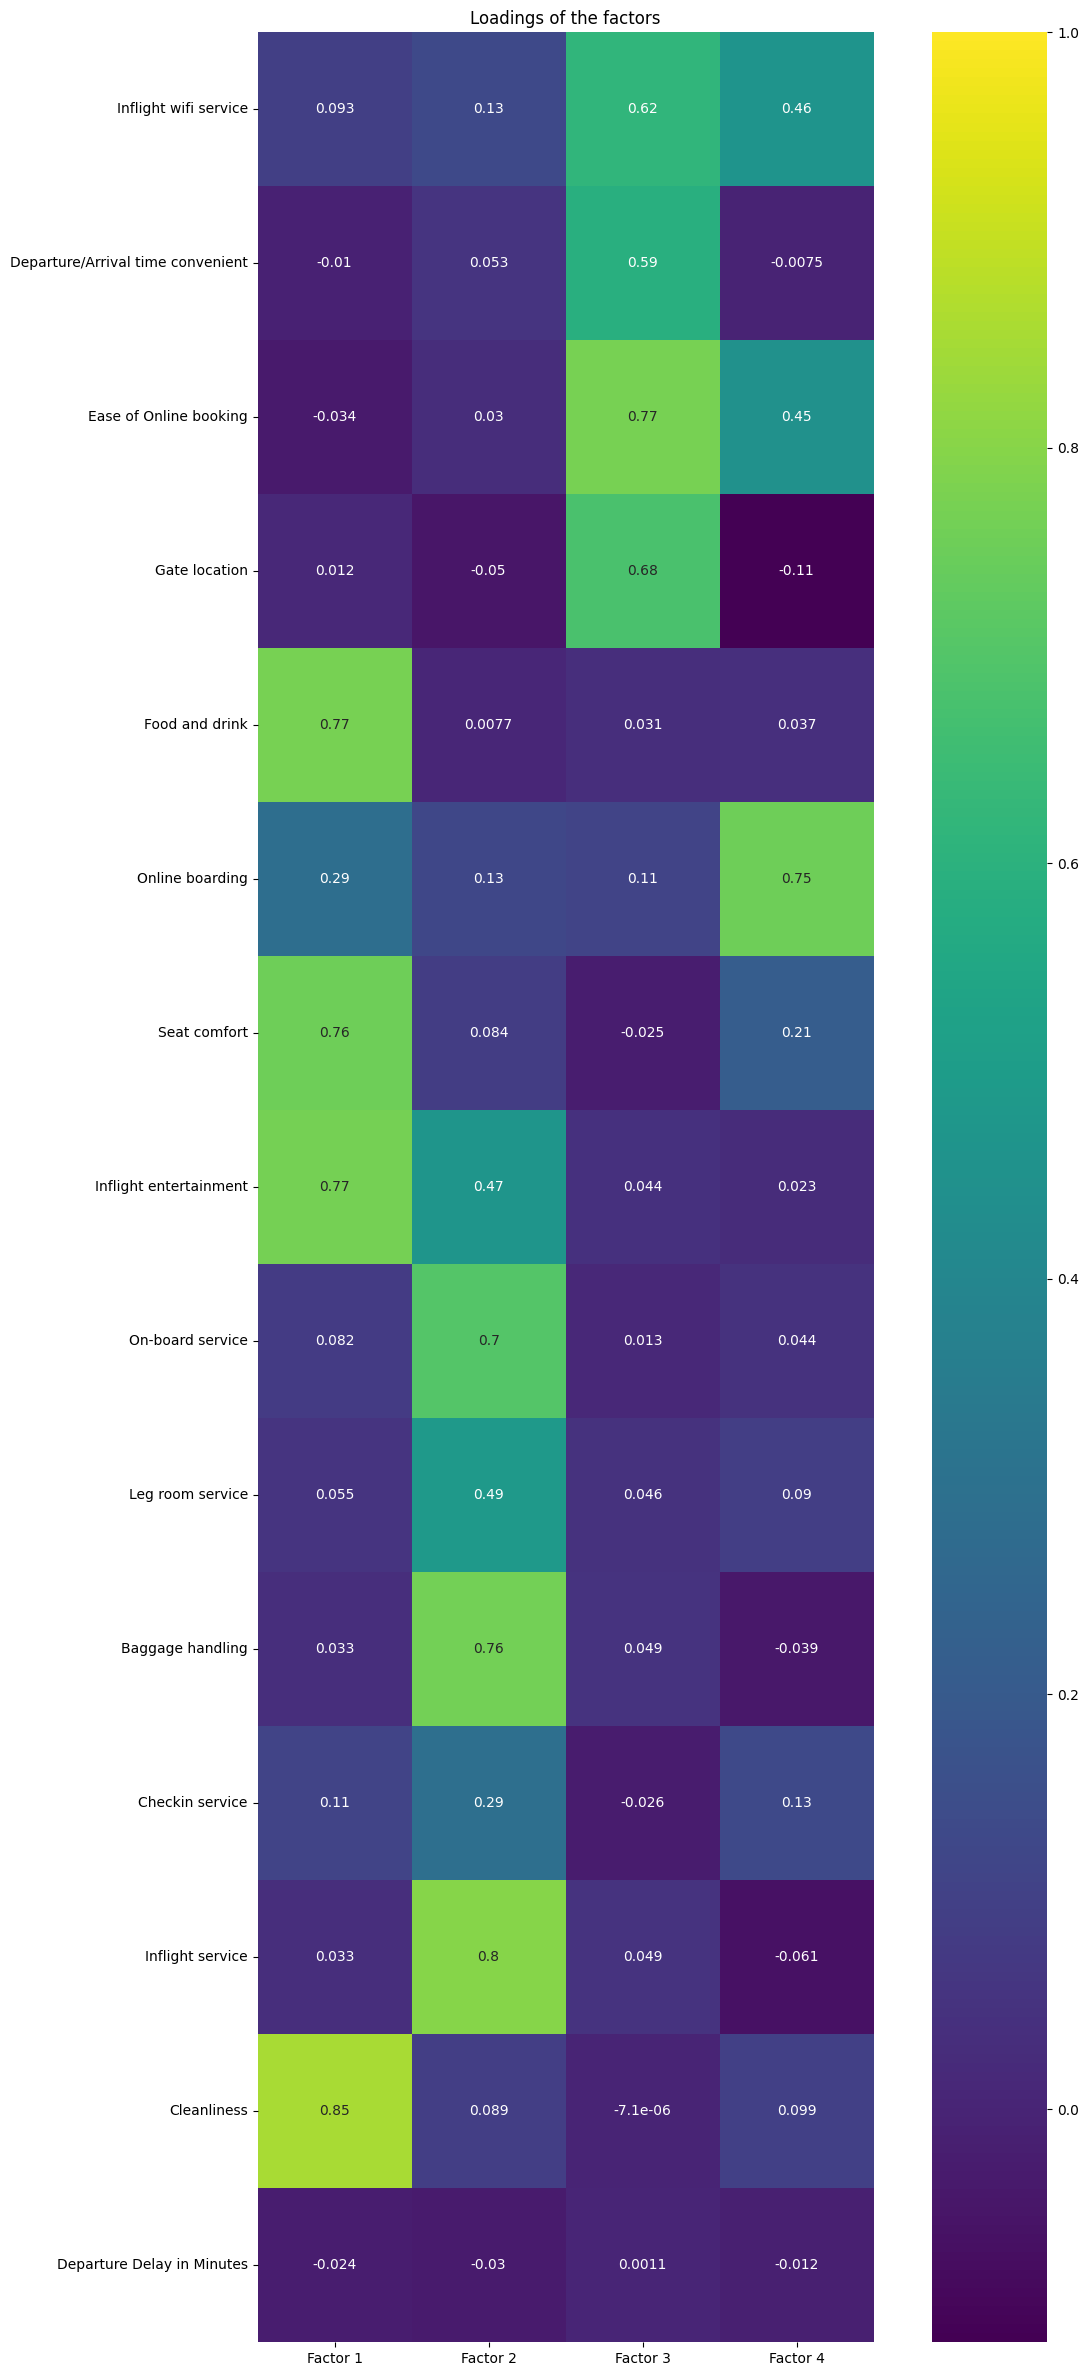

In [17]:
plt.figure(figsize=(15, 30))
sns.heatmap(lmatrix, vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Loadings of the factors')
plt.show()

Yếu tố Departure Delay in Minutes được thể hiện ít nhất thông qua 5 nhân tố này. Yếu tố Cleanliness thể hiện được nhiều nhất

Tính cộng đồng (còn gọi là phương sai chung h^2) là tỷ lệ biến thiên của mỗi biến được giải thích bởi các yếu tố, là tổng phương sai được tính bởi nhân tố được chọn. Các giá trị gần bằng 1 cho thấy các yếu tố được trích xuất giải thích nhiều hơn về phương sai của một mục riêng lẻ.
Các biến có tính cộng đồng thấp - ví dụ như thấp hơn 0,40 - không đóng góp nhiều vào việc đo lường các yếu tố cơ bản.

In [14]:
#tỷ lệ phương sai của mỗi biến được tính theo các nhân tố được chọn
fa.get_communalities()

array([0.62091568, 0.35065235, 0.80067601, 0.48067551, 0.59664905,
       0.67980446, 0.62327853, 0.80846041, 0.50222686, 0.24891006,
       0.58815897, 0.11440029, 0.64691507, 0.74604774, 0.00158795])

In [15]:
cmatrix = pd.DataFrame(fa.get_communalities(), index = list(df.columns), columns = ['Communalities'])
cmatrix

,Communalities
Inflight wifi service,0.620916
Departure/Arrival time convenient,0.350652
Ease of Online booking,0.800676
Gate location,0.480676
Food and drink,0.596649
Online boarding,0.679804
Seat comfort,0.623279
Inflight entertainment,0.808460
On-board service,0.502227
Leg room service,0.248910


In [32]:
gc = fa.get_communalities()
PSI = np.zeros((15, 1))  # Khởi tạo ma trận PSI
for i in range(0, len(gc)):
    PSI[i] = 1 - gc[i]

PPSI = np.zeros((15, 15)) 
for i in range(0, len(PSI)):
    PPSI[i, i] = PSI[i]

PPSI1= pd.DataFrame(PPSI)
PPSI1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22072\449549939.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  PPSI[i, i] = PSI[i]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.379084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.000000,0.649348,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.199324,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.519324,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.403351,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.320196,0.000000,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.376721,0.00000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.19154,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.497773,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.75109,0.000000,0.0000,0.000000,0.000000,0.000000


The above output is not human-eye friendly, so we make the below dataframes.

In [30]:
#Ma trận tương quan phù hợp
ld= fa.loadings_ 
transpose_matrix = np.transpose(ld)
Sigma = np.dot(ld, transpose_matrix) + PPSI
Sigma1 = pd.DataFrame(Sigma)
Sigma1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.365609,0.684518,0.362313,0.109018,0.461552,0.163988,0.171907,0.131125,0.140363,0.118546,0.095082,0.113034,0.137468,-0.011228
1,0.365609,1.000000,0.454823,0.400342,0.010658,0.062951,-0.019793,0.042527,0.043893,0.051387,0.069569,-0.001974,0.071614,-0.004840,-0.000594
2,0.684518,0.454823,1.000000,0.475894,0.014542,0.416416,0.051538,0.031802,0.048204,0.088017,0.042557,0.044143,0.033629,0.017959,-0.004732
3,0.362313,0.400342,0.475894,1.000000,0.026456,-0.012257,-0.035659,0.013220,-0.030028,-0.002561,0.000234,-0.045469,0.000869,-0.004989,0.003310
4,0.109018,0.010658,0.014542,0.026456,1.000000,0.253409,0.590144,0.595889,0.070892,0.051061,0.031550,0.092608,0.030886,0.662195,-0.018842
5,0.461552,0.062951,0.416416,-0.012257,0.253409,1.000000,0.384031,0.301215,0.147461,0.150124,0.082473,0.165921,0.070198,0.331278,-0.019688
6,0.163988,-0.019793,0.051538,-0.035659,0.590144,0.384031,1.000000,0.621539,0.130153,0.100309,0.079717,0.137509,0.077934,0.673335,-0.022948
7,0.171907,0.042527,0.031802,0.013220,0.595889,0.301215,0.621539,1.000000,0.394120,0.274127,0.384906,0.223315,0.401244,0.697162,-0.032207
8,0.131125,0.043893,0.048204,-0.030028,0.070892,0.147461,0.130153,0.394120,1.000000,0.350131,0.538013,0.217874,0.562419,0.137011,-0.023289
9,0.140363,0.051387,0.088017,-0.002561,0.051061,0.150124,0.100309,0.274127,0.350131,1.000000,0.371352,0.157327,0.386902,0.099205,-0.016748


In [31]:
#Ma trận phần dư
cor1 = df.corr().values
resid = cor1 - Sigma 
resid
resid_df = pd.DataFrame(resid)

# Hiển thị resid_df
resid_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,-0.020763,0.030371,-0.023765,0.023091,-0.004130,-0.042616,0.035980,-0.011097,0.020051,0.002002,-0.051235,-0.002735,-0.006305,-0.004818
1,-0.020763,0.000000,-0.017126,0.047068,-0.009601,0.009224,0.028500,-0.050717,0.023153,-0.040753,0.001077,0.093191,0.000552,0.014862,0.001204
2,0.030371,-0.017126,0.000000,-0.015740,0.016096,-0.011471,-0.022936,0.014867,-0.009164,0.021324,-0.003342,-0.035308,0.001727,-0.002809,-0.000598
3,-0.023765,0.047068,-0.015740,0.000000,-0.029281,0.014836,0.038152,-0.010469,0.000918,-0.002585,0.000863,0.006175,-0.000532,-0.001077,0.002633
4,0.023091,-0.009601,0.016096,-0.029281,0.000000,-0.019884,-0.014150,0.027477,-0.013416,-0.017846,0.003864,-0.007506,0.004538,-0.004169,-0.010509
5,-0.004130,0.009224,-0.011471,0.014836,-0.019884,0.000000,0.035138,-0.017207,0.006811,-0.026975,0.001090,0.038294,0.003774,-0.001946,0.000369
6,-0.042616,0.028500,-0.022936,0.038152,-0.014150,0.035138,0.000000,-0.009590,0.000502,0.003934,-0.005100,0.052329,-0.009022,0.006322,-0.004764
7,0.035980,-0.050717,0.014867,-0.010469,0.027477,-0.017207,-0.009590,0.000000,0.024742,0.026446,-0.005615,-0.103652,0.005317,-0.004671,0.005041
8,-0.011097,0.023153,-0.009164,0.000918,-0.013416,0.006811,0.000502,0.024742,0.000000,0.007746,-0.017613,0.026746,-0.010960,-0.014803,-0.007182
9,0.020051,-0.040753,0.021324,-0.002585,-0.017846,-0.026975,0.003934,0.026446,0.007746,0.000000,0.000248,-0.004612,-0.017069,-0.002428,0.031087


Let's sort the dataframe based on each factor using cut off value 0.2.

In [ ]:
lmatrix.sort_values('Factor 1', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Communalities
Cleanliness,0.853401,0.088800,-0.000007,0.099339,0.746048
Food and drink,0.770890,0.007706,0.031326,0.036565,0.596649
Inflight entertainment,0.765443,0.469186,0.043598,0.022827,0.808460
Seat comfort,0.755716,0.083901,-0.025206,0.210944,0.623279
Online boarding,0.287200,0.126517,0.110047,0.754456,0.679804
Checkin service,0.111999,0.289186,-0.025706,0.132541,0.114400
Inflight wifi service,0.093052,0.134820,0.615484,0.463961,0.620916
On-board service,0.082294,0.702358,0.013276,0.044409,0.502227
Leg room service,0.055267,0.485487,0.045599,0.089881,0.248910
Baggage handling,0.033114,0.763634,0.049389,-0.038551,0.588159


In [ ]:
lmatrix.sort_values('Factor 2', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Communalities
Inflight service,0.032951,0.799812,0.049316,-0.060815,0.646915
Baggage handling,0.033114,0.763634,0.049389,-0.038551,0.588159
On-board service,0.082294,0.702358,0.013276,0.044409,0.502227
Leg room service,0.055267,0.485487,0.045599,0.089881,0.248910
Inflight entertainment,0.765443,0.469186,0.043598,0.022827,0.808460
Checkin service,0.111999,0.289186,-0.025706,0.132541,0.114400
Inflight wifi service,0.093052,0.134820,0.615484,0.463961,0.620916
Online boarding,0.287200,0.126517,0.110047,0.754456,0.679804
Cleanliness,0.853401,0.088800,-0.000007,0.099339,0.746048
Seat comfort,0.755716,0.083901,-0.025206,0.210944,0.623279


In [ ]:
lmatrix.sort_values('Factor 3', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Communalities
Ease of Online booking,-0.034082,0.029731,0.773800,0.447062,0.800676
Gate location,0.012412,-0.050015,0.682242,-0.112097,0.480676
Inflight wifi service,0.093052,0.134820,0.615484,0.463961,0.620916
Departure/Arrival time convenient,-0.010308,0.053033,0.589641,-0.007537,0.350652
Online boarding,0.287200,0.126517,0.110047,0.754456,0.679804
Baggage handling,0.033114,0.763634,0.049389,-0.038551,0.588159
Inflight service,0.032951,0.799812,0.049316,-0.060815,0.646915
Leg room service,0.055267,0.485487,0.045599,0.089881,0.248910
Inflight entertainment,0.765443,0.469186,0.043598,0.022827,0.808460
Food and drink,0.770890,0.007706,0.031326,0.036565,0.596649


In [ ]:
lmatrix.sort_values('Factor 4', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Communalities
Online boarding,0.287200,0.126517,0.110047,0.754456,0.679804
Inflight wifi service,0.093052,0.134820,0.615484,0.463961,0.620916
Ease of Online booking,-0.034082,0.029731,0.773800,0.447062,0.800676
Seat comfort,0.755716,0.083901,-0.025206,0.210944,0.623279
Checkin service,0.111999,0.289186,-0.025706,0.132541,0.114400
Cleanliness,0.853401,0.088800,-0.000007,0.099339,0.746048
Leg room service,0.055267,0.485487,0.045599,0.089881,0.248910
On-board service,0.082294,0.702358,0.013276,0.044409,0.502227
Food and drink,0.770890,0.007706,0.031326,0.036565,0.596649
Inflight entertainment,0.765443,0.469186,0.043598,0.022827,0.808460


Ta chia ra được các biến quan sát phụ thuộc vào 4 nhân tố:
* Comfort: Cleanliness, Food and Drink, Inflight Entertainment, Seat Comfort
* Service: Inflight Services, Baggage Handling, Onboard Services, Leg Room
* Convenience: Ease of Online Booking, Gate location
* Network: Online boarding, Inflight Wifi service


In [18]:
fa.get_factor_variance()


(array([2.59725008, 2.31184703, 1.81413456, 1.08612727]),
 array([0.17315001, 0.15412314, 0.1209423 , 0.07240848]),
 array([0.17315001, 0.32727314, 0.44821544, 0.52062393]))

In [21]:
vmatrix = {
    'factor_1': [2.59725008, 0.17315001, 0.17315001],
    'factor_2': [2.31184703, 0.15412314, 0.32727314],
    'factor_3': [1.81413456, 0.1209423, 0.44821544],
    'factor_4': [1.08612727, 0.07240848, 0.52062393]
    
}

# Tạo DataFrame từ dữ liệu
df5 = pd.DataFrame(vmatrix)

df5

   factor_1  factor_2  factor_3  factor_4
0   2.59725  2.311847  1.814135  1.086127
1   0.17315  0.154123  0.120942  0.072408
2   0.17315  0.327273  0.448215  0.520624



Nhận xét: 
* dòng 1 thể hiện TỔNG TẢI TRỌNG BÌNH PHƯƠNG ( SS LOADINGS) của 4 nhân tố
* dòng 2 thể hiện tỷ lệ của phương sai 
* dòng 3 thể hiện phương sai tích lũy
* => 4 nhân tố này thể hiện tổng 52,06% phương sai của bộ liệu

Chúng ta có thể sử dụng những yếu tố mới này làm biến số cho các phân tích khác hoặc để dự đoán.